In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score
%matplotlib inline

D:\MyPrograms\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\MyPrograms\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train_set = pd.read_csv('train.csv')

In [3]:
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
train_set.info()
X_train_set = train_set[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']]
y_train_set = train_set[['Survived']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [5]:
X_train_set['Sex'] = train_set['Sex'].replace(to_replace=['male', 'female'], value=[0,1])

D:\MyPrograms\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
mu = train_set['Age'].mean()
print mu
sigma = np.sqrt(train_set['Age'].var())
train_set = train_set.drop(['PassengerId', 'Cabin'], axis=1)
print sigma

29.6991176471
14.5264973323


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000005AF7710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C15C240>]], dtype=object)

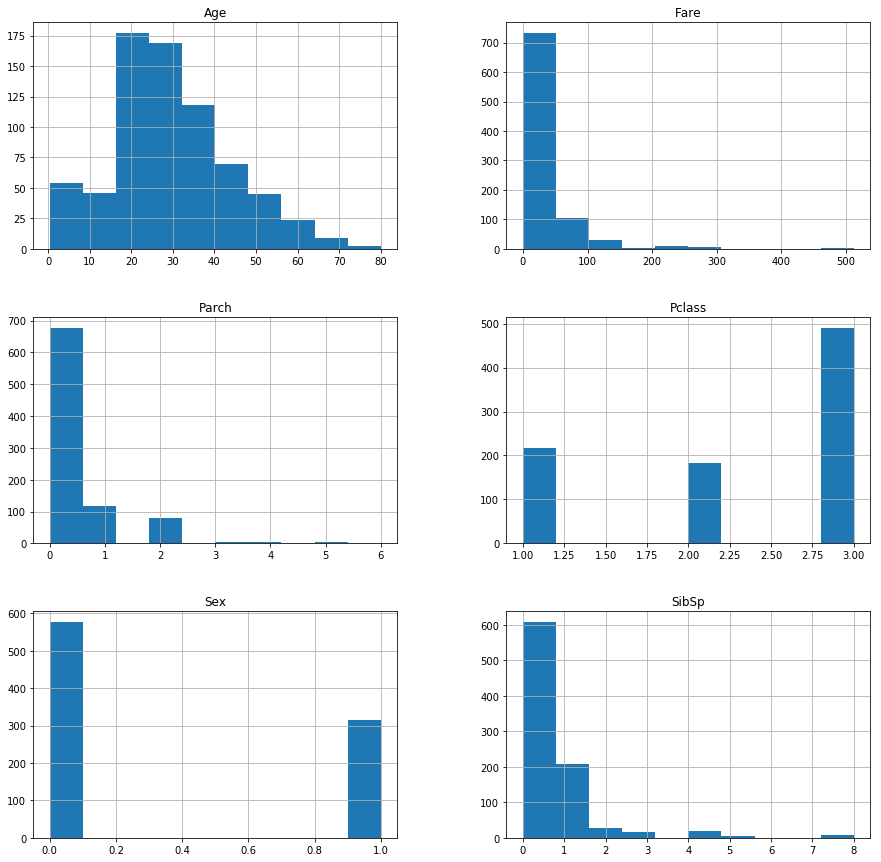

In [7]:
X_train_set.hist(figsize=(15,15))

D:\MyPrograms\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


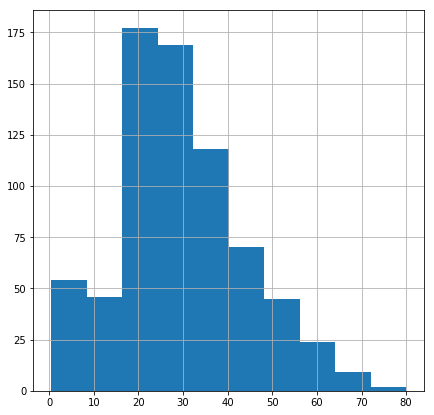

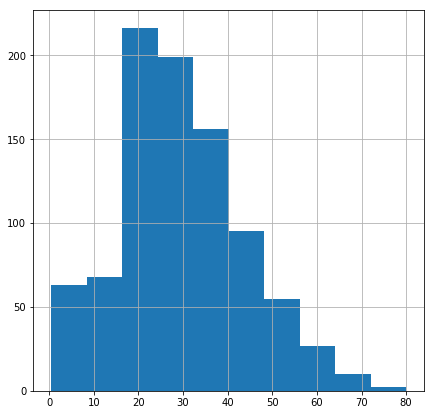

In [9]:
X_train_set['Age'].hist(figsize=(7,7))
rnd_normal = np.random.normal(mu, sigma, 177)
#print rnd_normal
k = 0
for i, el in enumerate(X_train_set['Age']):
    if np.isnan(el):
        X_train_set['Age'][i] = np.absolute(rnd_normal[k])
        k += 1
plt.figure()
X_train_set['Age'].hist(figsize=(7,7))

In [10]:
#print train_set['Age']

In [11]:
X_test_set = pd.read_csv('test.csv')
X_test_set = X_test_set.drop(['PassengerId', 'Cabin'], axis=1)
X_test_set.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [12]:
y_test_set = pd.read_csv('gender_submission.csv')
y_test_set = y_test_set.drop(['PassengerId'], axis=1)
y_test_set.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [13]:
X_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C5207F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EEFD1D0>]], dtype=object)

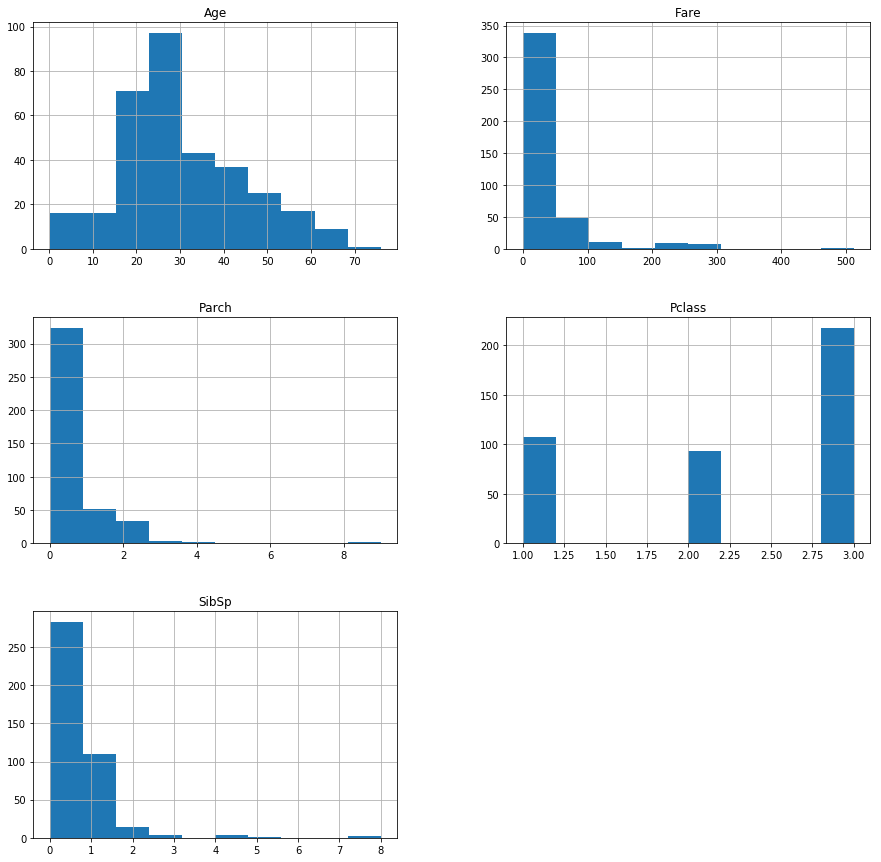

In [14]:
X_test_set.hist(figsize=(15,15))

D:\MyPrograms\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


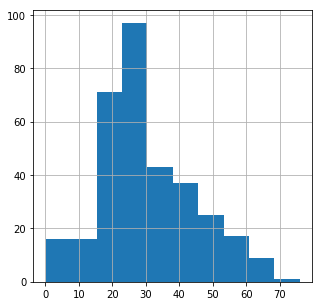

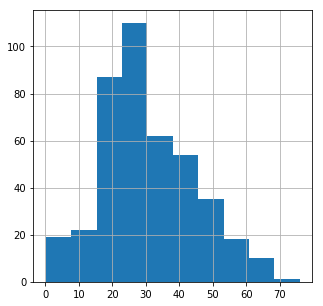

In [15]:
X_test_set['Age'].hist(figsize=(5,5))
rnd_normal = np.random.normal(mu, sigma, 86)
#print rnd_normal
k = 0
for i, el in enumerate(X_test_set['Age']):
    if np.isnan(el):
        X_test_set['Age'][i] = np.absolute(rnd_normal[k])
        k += 1
plt.figure()
X_test_set['Age'].hist(figsize=(5,5))

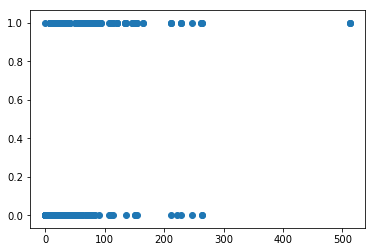

In [17]:
plt.scatter(X_train_set['Fare'], y_train_set)

In [18]:
X_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


In [25]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

estimator = LogisticRegression()
optimizer = GridSearchCV(estimator, param_grid, cv=3)

optimizer.fit(X_train_set, y_train_set)
plot_scores(optimizer)

auc_zeros_cat = roc_auc_score(y_true=y_test_set, y_score=optimizer.predict_proba(X_test_set)[:,1])

ValueError: could not convert string to float: Q

In [23]:
print y_train_set

     Survived
0           0
1           1
2           1
3           1
4           0
5           0
6           0
7           0
8           1
9           1
10          1
11          1
12          0
13          0
14          0
15          1
16          0
17          1
18          0
19          1
20          0
21          1
22          1
23          1
24          0
25          1
26          0
27          0
28          1
29          0
..        ...
861         0
862         1
863         0
864         0
865         1
866         1
867         0
868         0
869         1
870         0
871         1
872         0
873         0
874         1
875         1
876         0
877         0
878         0
879         1
880         1
881         0
882         0
883         0
884         0
885         0
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]
